In [143]:
import itertools
from paddle.vision.datasets import Cifar10,MNIST
import matplotlib.pyplot as plt
import numpy as np
import paddle
import pyffx

In [144]:
cifar10_train = Cifar10(
    mode= 'train',
    backend="cv2"   # 指定要返回的图像类型：PIL.Image 或 numpy.ndarray。必须是 {'pil'，'cv2'} 中的值
)

print(type(cifar10_train),len(cifar10_train))

<class 'paddle.vision.datasets.cifar.Cifar10'> 50000


In [145]:
img0,label0 = cifar10_train[0]
img0 = paddle.to_tensor(img0)
print(type(img0),img0.shape)
print(img0)

<class 'paddle.Tensor'> [32, 32, 3]
Tensor(shape=[32, 32, 3], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[[59. , 62. , 63. ],
         [43. , 46. , 45. ],
         [50. , 48. , 43. ],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[16. , 20. , 20. ],
         [0.  , 0.  , 0.  ],
         [18. , 8.  , 0.  ],
         ...,
         [123., 88. , 55. ],
         [119., 83. , 50. ],
         [122., 87. , 57. ]],

        [[25. , 24. , 21. ],
         [16. , 7.  , 0.  ],
         [49. , 27. , 8.  ],
         ...,
         [118., 84. , 50. ],
         [120., 84. , 50. ],
         [109., 73. , 42. ]],

        ...,

        [[208., 170., 96. ],
         [201., 153., 34. ],
         [198., 161., 26. ],
         ...,
         [160., 133., 70. ],
         [56. , 31. , 7.  ],
         [53. , 34. , 20. ]],

        [[180., 139., 96. ],
         [173., 123., 42. ],
         [186., 144., 30. ],
         ...,
        

In [146]:
def segment(x):
    height,width,c = x.shape
    block_size = 4
    assert (height % block_size == 0 | width % block_size == 0), "Image not divisible by block_size"
    
    blocks_axis0 = int(height / block_size)
    blocks_axis1 = int(width / block_size)
    
    x = paddle.reshape(x,
            [blocks_axis0,
            block_size,
            blocks_axis1,
            block_size,
            3]
        )
    x = paddle.transpose(x,[0,2,1,3,4])
    
    x = paddle.reshape(x,[
            blocks_axis0,
            blocks_axis1,
            block_size * block_size * 3]
        )
    
    return  x

In [147]:
img = segment(img0)

In [148]:
print(type(img),img.shape)
print(len(img))
print(img)

<class 'paddle.Tensor'> [8, 8, 48]
8
Tensor(shape=[8, 8, 48], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[[59. , 62. , 63. , ..., 106., 63. , 28. ],
         [98. , 73. , 52. , ..., 105., 62. , 33. ],
         [149., 117., 89. , ..., 109., 75. , 40. ],
         ...,
         [139., 112., 75. , ..., 131., 93. , 52. ],
         [152., 120., 89. , ..., 135., 93. , 51. ],
         [158., 130., 104., ..., 94. , 62. , 35. ]],

        [[50. , 32. , 21. , ..., 140., 97. , 53. ],
         [124., 77. , 36. , ..., 137., 89. , 46. ],
         [107., 72. , 34. , ..., 108., 70. , 39. ],
         ...,
         [134., 93. , 50. , ..., 112., 56. , 55. ],
         [135., 92. , 51. , ..., 114., 76. , 39. ],
         [103., 67. , 32. , ..., 102., 74. , 46. ]],

        [[137., 100., 68. , ..., 135., 97. , 55. ],
         [119., 81. , 44. , ..., 103., 74. , 42. ],
         [121., 80. , 40. , ..., 146., 86. , 22. ],
         ...,
         [77. , 42. , 27. , ..., 125., 78. , 40. ],
     

In [149]:
def integrate(x):
    x = paddle.reshape(x,[
            8,
            8,
            4,
            4,
            3]
        )
    x = paddle.transpose(x,[0, 2, 1, 3, 4])
    x = paddle.reshape(x,[
            8 * 4,
            8 * 4,
            3]
        )
    return x

In [150]:
img0 = integrate(img)

In [151]:
img0

Tensor(shape=[32, 32, 3], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[[59. , 62. , 63. ],
         [43. , 46. , 45. ],
         [50. , 48. , 43. ],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[16. , 20. , 20. ],
         [0.  , 0.  , 0.  ],
         [18. , 8.  , 0.  ],
         ...,
         [123., 88. , 55. ],
         [119., 83. , 50. ],
         [122., 87. , 57. ]],

        [[25. , 24. , 21. ],
         [16. , 7.  , 0.  ],
         [49. , 27. , 8.  ],
         ...,
         [118., 84. , 50. ],
         [120., 84. , 50. ],
         [109., 73. , 42. ]],

        ...,

        [[208., 170., 96. ],
         [201., 153., 34. ],
         [198., 161., 26. ],
         ...,
         [160., 133., 70. ],
         [56. , 31. , 7.  ],
         [53. , 34. , 20. ]],

        [[180., 139., 96. ],
         [173., 123., 42. ],
         [186., 144., 30. ],
         ...,
         [184., 148., 94. ],
         [97. ,

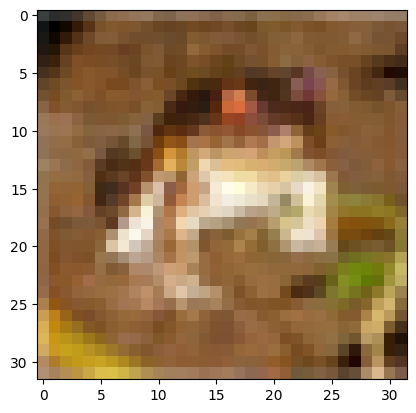

In [152]:
plt.imshow(img0/255)

# 复现完成

In [160]:
class BlockTransform:
    def __init__(self, block_size,height,width):
        super().__init__()
        self.block_size = block_size
        self.height = height
        self.width = width
        assert (self.height % self.block_size == 0 | self.width % self.block_size == 0), "Image not divisible by block_size"
        self.blocks_axis0 = int(height / self.block_size)
        self.blocks_axis1 = int(width / self.block_size)

    def segment(self,x):
        x = paddle.reshape(x,
            [self.blocks_axis0,
            self.block_size,
            self.blocks_axis1,
            self.block_size,
            3]
        )
        x = paddle.transpose(x,[0,2,1,3,4])
    
        x = paddle.reshape(x,[
            self.blocks_axis0,
            self.blocks_axis1,
            self.block_size * self.block_size * 3]
        )
    
        return  x
    def integrate(self,x):
        x = paddle.reshape(x,[
            self.blocks_axis0,
            self.blocks_axis0,
            self.block_size,
            self.block_size,
            3,]
        )
        x = paddle.transpose(x,[0, 2, 1, 3, 4])
        x = paddle.reshape(x,[
            self.blocks_axis0 * self.block_size,
            self.blocks_axis1 * self.block_size,
            3,]
        )
        return x
    def generate_key(self, seed, binary=False):
        paddle.seed(seed)
        key = paddle.randperm(self.block_size * self.block_size * 3)
        if binary:
            key = key > len(key) / 2
        return key

In [165]:
seed = 2024
password = 'password'

class Shuffle(BlockTransform):
    def __init__(self, block_size,height,width):
        super().__init__(block_size,height,width)
        self.key = self.generate_key(seed, binary=False)

    def forward(self, x, decrypt=False):
        x = self.segment(x)
        if decrypt:
            key = paddle.argsort(self.key)
            x = x[:, :, :, key]
        else:
            x = x[:, :, :, self.key]
        x = self.integrate(x)
        return x.contiguous()


class NP(BlockTransform):
    def __init__(self, block_size,height,width):
        super().__init__(block_size,height,width)
        self.key = self.generate_key(seed, binary=True)

    def forward(self, x, decrypt=False):
        # uncomment the following during training
        # X = self.denormalize(X)
        x = self.segment(x)
        x[:, :, :, self.key] = 1 - x[:, :, :, self.key]
        X = self.integrate(x)
        # uncomment the following during training
        # X = self.normalize(X)
        return x.contiguous()


class FFX(BlockTransform):
    def __init__(self, block_size,height,width):
        super().__init__(block_size,height,width)
        self.key = self.generate_key(seed, binary=True)
        self.lookup, self.relookup = self.generate_lookup(password)
        self.lookup, self.relookup = self.lookup.cuda(), self.relookup.cuda()

    def generate_lookup(self, password="password"):
        password = str.encode(password)
        fpe = pyffx.Integer(password, length=3)
        f = lambda x: fpe.encrypt(x)
        g = lambda x: fpe.decrypt(x)
        f = np.vectorize(f)
        g = np.vectorize(g)
        lookup = f(np.arange(256))
        relookup = g(np.arange(1000))
        lookup = paddle.to_tensor(lookup)
        relookup = paddle.to_tensor(relookup)
        return lookup, relookup
    
    def forward(self, x, decrypt=False):
        # uncomment the following during training
        # X = self.denormalize(X)
        x = self.segment(x)
        if decrypt:
            x = (x * self.lookup.max()).long()
            x[:, :, :, self.key] = self.relookup[x[:, :, :, self.key]]
            x = x.float()
            x = x / 255.0
        else:
            # important: without it cuda trigerring devise assertion error with index out of bound
            x = paddle.clip(x, 0, 1)
            x = (x * 255).long()
            x[:, :, :, self.key] = self.lookup[x[:, :, :, self.key]].clone()
            x = x.float()
            x = x / self.lookup.max()
        x = self.integrate(x)
        # uncomment the following during training
        # X = self.normalize(X)
        return x.contiguous()

In [166]:
img0,label0 = cifar10_train[0]
img0 = paddle.to_tensor(img0)

In [167]:
transform = BlockTransform(block_size = 4,height = 32,width = 32)
shuffle = Shuffle(transform)

TypeError: Shuffle.__init__() missing 2 required positional arguments: 'height' and 'width'